In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
import numpy as np
import statsmodels.api as sm

In [2]:
# chargement du fichier

df_model = pd.read_csv('C:\\Users\\mfila\\df_model.csv')

### 4.2. Regression linéaire

#### 4.2.1. Régression linéaire avec le revenu moyen du pays et l’indice de Gini du pays de l’individu.

In [3]:
df_model.head(1)

,Unnamed: 0,country_code,G_j,income,m_j,p_j,c_i_parents,ln_income,ln_m_j
0,0,ALB,32.141019,728.89795,7297.0,0.465537,1,6.591534,8.895219


In [4]:
# Regression

reg_rev_gini = smf.ols('income~m_j*G_j', data=df_model).fit()
print(reg_rev_gini.summary())
sm.stats.anova_lm(reg_rev_gini)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.581e+06
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:59:28   Log-Likelihood:            -5.9566e+07
No. Observations:             5800000   AIC:                         1.191e+08
Df Residuals:                 5799996   BIC:                         1.191e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1542.3771     21.217     72.695      0.0

,df,sum_sq,mean_sq,F,PR(>F)
m_j,1.0,2.300788e+14,2.300788e+14,4.719854e+06,0.0
G_j,1.0,9.158222e+10,9.158222e+10,1.878725e+03,0.0
m_j:G_j,1.0,1.045172e+12,1.045172e+12,2.144074e+04,0.0
Residual,5799996.0,2.827325e+14,4.874702e+07,NaN,NaN


In [5]:
#Regression lineaire des incomes logarithmique

reg_rev_gini_log = smf.ols('ln_income~ln_m_j*G_j', data=df_model).fit()
print(reg_rev_gini_log.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                 3.701e+06
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:59:43   Log-Likelihood:            -7.0004e+06
No. Observations:             5800000   AIC:                         1.400e+07
Df Residuals:                 5799996   BIC:                         1.400e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8972      0.014   -136.871      0.0

In [6]:
sm.stats.anova_lm(reg_rev_gini_log)

,df,sum_sq,mean_sq,F,PR(>F)
ln_m_j,1.0,7.134050e+06,7.134050e+06,1.090079e+07,0.0
G_j,1.0,1.045737e+05,1.045737e+05,1.597880e+05,0.0
ln_m_j:G_j,1.0,2.807093e+04,2.807093e+04,4.289223e+04,0.0
Residual,5799996.0,3.795822e+06,6.544526e-01,NaN,NaN


In [7]:
#Autre méthode de calcul de la variance expliquée du modèle
var_exp_model = round((reg_rev_gini_log.ess / reg_rev_gini_log.centered_tss)*100,2)
var_exp_model

65.69

In [8]:
#Variance totale SCT
reg_rev_gini_log.centered_tss

11062516.886137355

In [9]:
#Variance expliquée SCE
reg_rev_gini_log.ess

7266694.675770333

In [10]:
#Variance résiduelle SCR
reg_rev_gini_log.ssr

3795822.2103670216

In [11]:
# Anova sur les variables de notre régression linéaire
anova_ln = sm.stats.anova_lm(reg_rev_gini_log, typ=1)
anova_ln

,df,sum_sq,mean_sq,F,PR(>F)
ln_m_j,1.0,7.134050e+06,7.134050e+06,1.090079e+07,0.0
G_j,1.0,1.045737e+05,1.045737e+05,1.597880e+05,0.0
ln_m_j:G_j,1.0,2.807093e+04,2.807093e+04,4.289223e+04,0.0
Residual,5799996.0,3.795822e+06,6.544526e-01,NaN,NaN


In [13]:
# Calcul du R2 pour la variable 'G_j'
r2_Gj = anova_ln.sum_sq['G_j'] / anova_ln['sum_sq'].sum()
r2_Gj

0.009452975137255789

In [14]:
# Calcul du R2 pour la variable 'ln_m_j'
r2_ln_mj = anova_ln.sum_sq['ln_m_j'] / anova_ln['sum_sq'].sum()
r2_ln_mj

0.6448848957346441

In [15]:
# Calcul du R2 pour les interactions entre les variables 'ln_m_j' et 'G_j'
r2_Gj_mj = anova_ln.sum_sq['ln_m_j:G_j'] / anova_ln['sum_sq'].sum()
r2_Gj_mj

0.0025374813245870077

In [16]:
# Vérification
r2_Gj + r2_ln_mj + r2_Gj_mj, reg_rev_gini_log.rsquared

(0.6568753521964869, 0.6568753521973253)

#### 4.2.2. Régression linéaire avec 3 variables : le revenu moyen du pays, l’indice de Gini et la classe de revenu des parents

In [17]:
#Regression lineaire avec le revenu moyen, l'index de Gini et la classe de revenu des parents non-logarithmique

reg_rev_gini_class = smf.ols('income~m_j*G_j*c_i_parents', data=df_model).fit()
print(reg_rev_gini_class.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 8.078e+05
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:05:43   Log-Likelihood:            -5.9326e+07
No. Observations:             5800000   AIC:                         1.187e+08
Df Residuals:                 5799992   BIC:                         1.187e+08
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3004.4895    

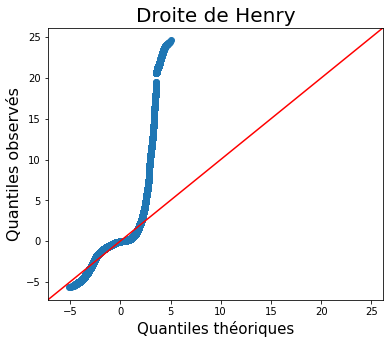

In [32]:
# droite de Henry pour une représentation graphique de la distribution de résidus

def residus_henry(model, nom, couleur, ax):
    sm.qqplot(model.resid, ax=ax, line="45", fit=True, color=couleur)
    ax.set_title("Droite de Henry", fontsize=20)
    ax.set_xlabel("Quantiles théoriques" ,fontsize=15), ax.set_ylabel("Quantiles observés", fontsize=16)
fig, ax = plt.subplots(1, 1, figsize=(6, 5)); 
residus_henry(reg_rev_gini_class, "ANOVA", "brown", ax)

In [21]:
#Regression lineaire avec le revenu moyen logarithmique, l'index de Gini et la classe de revenu des parents logarithmique

reg_rev_gini_class_log = smf.ols('ln_income~ln_m_j*G_j*c_i_parents', data=df_model).fit()
print(reg_rev_gini_class_log.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 2.172e+06
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:15:17   Log-Likelihood:            -6.3710e+06
No. Observations:             5800000   AIC:                         1.274e+07
Df Residuals:                 5799992   BIC:                         1.274e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [22]:
# Table d'analyse de la variance avec statsmodels
anova_ln = sm.stats.anova_lm(reg_rev_gini_class_log, typ=1)
anova_ln

,df,sum_sq,mean_sq,F,PR(>F)
ln_m_j,1.0,7.134050e+06,7.134050e+06,1.354291e+07,0.000000
G_j,1.0,1.045737e+05,1.045737e+05,1.985173e+05,0.000000
ln_m_j:G_j,1.0,2.807093e+04,2.807093e+04,5.328841e+04,0.000000
c_i_parents,1.0,6.225429e+05,6.225429e+05,1.181804e+06,0.000000
ln_m_j:c_i_parents,1.0,1.674821e+04,1.674821e+04,3.179395e+04,0.000000
G_j:c_i_parents,1.0,1.012394e+05,1.012394e+05,1.921877e+05,0.000000
ln_m_j:G_j:c_i_parents,1.0,8.928820e+00,8.928820e+00,1.695001e+01,0.000038
Residual,5799992.0,3.055283e+06,5.267736e-01,NaN,NaN


In [24]:
# Calcul du R2 pour la variable 'c_i_parents'
r3_Gj = anova_ln.sum_sq['c_i_parents'] / anova_ln['sum_sq'].sum()
r3_Gj

0.05627498245817797

In [25]:
# Calcul du R2 pour la variable 'ln_m_j'
r3_Gj = anova_ln.sum_sq['ln_m_j'] / anova_ln['sum_sq'].sum()
r3_Gj

0.6448848957346418

In [26]:
# Calcul du R2 pour la variable 'G_j'
r3_Gj = anova_ln.sum_sq['G_j'] / anova_ln['sum_sq'].sum()
r3_Gj

0.009452975137255754

In [27]:
# Calcul du R2 pour la variable 'ln_m_j:G_j'
r3_Gj = anova_ln.sum_sq['ln_m_j:G_j'] / anova_ln['sum_sq'].sum()
r3_Gj

0.002537481324586998

In [28]:
# Calcul du R2 pour la variable 'ln_m_j:c_i_parents'
r3_Gj = anova_ln.sum_sq['ln_m_j:c_i_parents'] / anova_ln['sum_sq'].sum()
r3_Gj

0.0015139606209041599

In [29]:
# Calcul du R2 pour la variable 'G_j:c_i_parents'
r3_Gj = anova_ln.sum_sq['G_j:c_i_parents'] / anova_ln['sum_sq'].sum()
r3_Gj

0.009151569766064842

In [30]:
# Calcul du R2 pour la variable 'ln_m_j:G_j:c_i_parents'
r3_Gj = anova_ln.sum_sq['ln_m_j:G_j:c_i_parents'] / anova_ln['sum_sq'].sum()
r3_Gj

8.071237566081045e-07

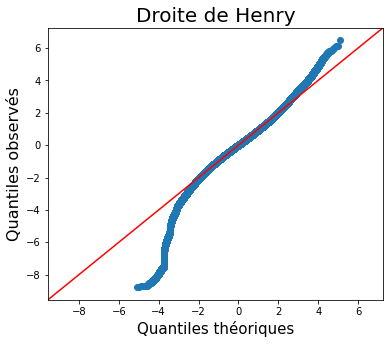

In [31]:
# droite de Henry pour une représentation graphique de la distribution de résidus

def residus_henry(model, nom, couleur, ax):
    sm.qqplot(model.resid, ax=ax, line="45", fit=True, color=couleur)
    ax.set_title("Droite de Henry", fontsize=20)
    ax.set_xlabel("Quantiles théoriques" ,fontsize=15), ax.set_ylabel("Quantiles observés", fontsize=16)
fig, ax = plt.subplots(1, 1, figsize=(6, 5)); 
residus_henry(reg_rev_gini_class_log, "ANOVA", "brown", ax)

In [33]:
# Vérification de l'homoscédasticité des résidus : Breusch-Pagan

def test_residus_BP(model):
    BP=sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    print("TEST DE BREUSCH-PAGAN:", " statistic =", BP[0], " pvalue =", BP[1])
    
test_residus_BP(reg_rev_gini_class_log)

TEST DE BREUSCH-PAGAN:  statistic = 170420.23603098842  pvalue = 0.0
